In [1]:
from pathways import Pathways

In [4]:
p = Pathways(datapackage="/Users/romain/GitHub/premise/dev/image-SSP2-RCP19/datapackage.json")

Invalid datapackage: Descriptor validation error: {'path': 'mapping/mapping.yaml', 'profile': 'data-resource', 'name': 'mapping', 'format': 'yaml', 'mediatype': 'text/yaml', 'encoding': 'utf-8'} is not valid under any of the given schemas at "resources/45" in descriptor and at "properties/resources/items/oneOf" in profile
Invalid datapackage: Descriptor validation error: 'data-resource' is not one of ['tabular-data-resource'] at "resources/45/profile" in descriptor and at "properties/resources/items/properties/profile/enum" in profile


In [5]:
p.calculate(
    methods=[
        'IPCC 2021 - climate change - GWP 100a, incl. H',
        'EN15804 - inventory indicators ISO21930 - Cumulative Energy Demand - renewable energy resources',
        'EN15804 - inventory indicators ISO21930 - Cumulative Energy Demand - non-renewable energy resources',
        'EN15804 - inventory indicators ISO21930 - use of net fresh water',
        'EF v3.1 EN15804 - particulate matter formation - impact on human health',
    ],
    regions=[r for r in p.scenarios.coords["region"].values if r!="World"],
    #regions=["World",],
    scenarios=[
        #"SSP2-Base",
        "SSP2-RCP19",
    ],
    variables=[
        v for v in p.scenarios.coords["variables"].values
        if any(i in v for i in ["Industry", "Transport", "Heating"])
    ],
    #variables=["Transport_Freight_(train)_Liquid_fossil"],
    #variables = ["Electricity", ],
    characterization=True
)
arr = p.display_results(cutoff=0.01)

Calculating LCA results for image...
--- Calculating LCA results for SSP2-RCP19...
------ Calculating LCA results for 2005...
------ Calculating LCA results for 2010...
------ Calculating LCA results for 2015...
LCA matrices not found for the given model, scenario, and year.
------ Calculating LCA results for 2020...
------ Calculating LCA results for 2025...
LCA matrices not found for the given model, scenario, and year.
------ Calculating LCA results for 2030...
------ Calculating LCA results for 2035...
LCA matrices not found for the given model, scenario, and year.
------ Calculating LCA results for 2040...
------ Calculating LCA results for 2045...
LCA matrices not found for the given model, scenario, and year.
------ Calculating LCA results for 2050...
------ Calculating LCA results for 2060...
------ Calculating LCA results for 2070...
------ Calculating LCA results for 2080...
------ Calculating LCA results for 2090...
------ Calculating LCA results for 2100...


In [6]:
arr.to_netcdf("results_image_SSP2-RCP19.nc")

In [4]:
df = arr.to_dataframe("x").unstack()["x"].reset_index().melt(id_vars=[
    "model", "scenario", "region", "impact_category", "variable", "year"
])

In [5]:
df[['Main sector', 'Sub sector', 'Energy carrier']] = df['variable'].str.split('_', expand=True)

KeyboardInterrupt: 

In [1]:
from pathways import Pathways
p = Pathways(datapackage="/Users/romain/GitHub/premise/dev/image-SSP2/datapackage.json")

Invalid datapackage: Descriptor validation error: {'path': 'mapping/mapping.yaml', 'profile': 'data-resource', 'name': 'mapping', 'format': 'yaml', 'mediatype': 'text/yaml', 'encoding': 'utf-8'} is not valid under any of the given schemas at "resources/89" in descriptor and at "properties/resources/items/oneOf" in profile
Invalid datapackage: Descriptor validation error: 'data-resource' is not one of ['tabular-data-resource'] at "resources/89/profile" in descriptor and at "properties/resources/items/properties/profile/enum" in profile


In [2]:
metals = [
    #"Aluminium",
    #"Cadmium",
    "Cobalt",
    #"Graphite",
    #"Iridium",
    #"Iron",
    #"Lanthanum",
    #"Lead",
    "Lithium",
    #"Magnesium",
    #"Manganese",
    #"Molybdenum",
    #"Neodymium",
    "Nickel",
    #"Palladium",
    "Platinum",
    #"Tin",
    #"Silver",
    "Titanium",
    #"Uranium",
    "Vanadium",
    "Zinc",
]

p.calculate(
    regions=[r for r in p.scenarios.coords["region"].values if r!="World"],
    #regions=["World",],
    scenarios=[
        "SSP2-Base",
        "SSP2-RCP19",
    ],
    #regions=["WEU",],
    years=[2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100],
    variables=[
        v for v in p.scenarios.coords["variables"].values
        if any(i in v for i in ["Industry", "Transport", "Heating"])
    ],
    characterization=False,
    flows=[(metal, "natural resource", "in ground", "kilogram") for metal in metals]
    #flows=[("Carbon dioxide, fossil", "air", "unspecified", "kilogram"),]
)
arr = p.display_results(cutoff=0.01)

Calculating LCA results for image...
--- Calculating LCA results for SSP2-Base...
------ Calculating LCA results for 2020...
------ Calculating LCA results for 2030...
------ Calculating LCA results for 2040...
------ Calculating LCA results for 2050...
------ Calculating LCA results for 2060...
------ Calculating LCA results for 2070...
------ Calculating LCA results for 2080...
------ Calculating LCA results for 2090...
------ Calculating LCA results for 2100...
--- Calculating LCA results for SSP2-RCP19...
------ Calculating LCA results for 2020...
------ Calculating LCA results for 2030...
------ Calculating LCA results for 2040...
------ Calculating LCA results for 2050...
------ Calculating LCA results for 2060...
------ Calculating LCA results for 2070...
------ Calculating LCA results for 2080...
------ Calculating LCA results for 2090...
------ Calculating LCA results for 2100...


In [7]:
arr.loc[dict(impact_category="Vanadium - natural resource - in ground - kilogram")] *= 1.23e-2

In [6]:
arr.coords["impact_category"].values

array(['Cobalt - natural resource - in ground - kilogram',
       'Lithium - natural resource - in ground - kilogram',
       'Nickel - natural resource - in ground - kilogram',
       'Platinum - natural resource - in ground - kilogram',
       'Titanium - natural resource - in ground - kilogram',
       'Vanadium - natural resource - in ground - kilogram',
       'Zinc - natural resource - in ground - kilogram'], dtype=object)

In [8]:
arr.to_netcdf("results_image_SSP2_metals2.nc")

In [9]:
df = arr.to_dataframe("x").unstack()["x"].reset_index().melt(id_vars=[
    "model", "scenario", "region", "impact_category", "variable", "year"
])
df.head()

,model,scenario,region,impact_category,variable,year,act_category,value
0,image,SSP2-Base,BRA,Cobalt - natural resource - in ground - kilogram,Heating_Commercial (space heating)_Electricity,2020,Manufacture of basic chemicals,NaN
1,image,SSP2-Base,BRA,Cobalt - natural resource - in ground - kilogram,Heating_Commercial (space heating)_Liquid fossil,2020,Manufacture of basic chemicals,NaN
2,image,SSP2-Base,BRA,Cobalt - natural resource - in ground - kilogram,Heating_Commercial (space heating)_Natural gas,2020,Manufacture of basic chemicals,NaN
3,image,SSP2-Base,BRA,Cobalt - natural resource - in ground - kilogram,Heating_Commercial (space heating)_Solid biomass,2020,Manufacture of basic chemicals,NaN
4,image,SSP2-Base,BRA,Cobalt - natural resource - in ground - kilogram,Heating_Commercial (space heating)_Solid coal,2020,Manufacture of basic chemicals,NaN


In [10]:
years = [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
df_short = df.loc[df["year"].isin(years)]
len(df_short)

1906632

In [11]:
df_short[['Main sector', 'Sub sector', 'Energy carrier']] = df_short['variable'].str.split('_', expand=True)

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_5243/1532667233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short[['Main sector', 'Sub sector', 'Energy carrier']] = df_short['variable'].str.split('_', expand=True)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_5243/1532667233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short[['Main sector', 'Sub sector', 'Energy carrier']] = df_short['variable'].str.split('_', expand=True)
/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs0

In [13]:
df_short["impact_category"] = df_short["impact_category"].str.replace(" - natural resource - in ground - kilogram", "")

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_5243/3107786552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["impact_category"] = df_short["impact_category"].str.replace(" - natural resource - in ground - kilogram", "")


In [17]:
df_short["impact_category"].unique()

array(['Cobalt', 'Lithium', 'Nickel', 'Platinum', 'Titanium', 'Vanadium',
       'Zinc'], dtype=object)

In [14]:
from pivottablejs import pivot_ui
from IPython.display import HTML

In [16]:
pivot_ui(df_short, outfile_path='pivottable_all_metals.html')

In [4]:
p = Pathways(datapackage="/Users/romain/GitHub/premise/dev/image-SSP2-RCP19/datapackage.json")

DataPackageException: Unable to load JSON at "/Users/romain/GitHub/premise/dev/image-SSP2-RCP19/datapackage.json"

In [ ]:
p.calculate(
    methods=[
        'IPCC 2021 - climate change - GWP 100a, incl. H',
        'EN15804 - inventory indicators ISO21930 - Cumulative Energy Demand - renewable energy resources',
        'EN15804 - inventory indicators ISO21930 - Cumulative Energy Demand - non-renewable energy resources',
        'EN15804 - inventory indicators ISO21930 - use of net fresh water',
        'EF v3.1 EN15804 - particulate matter formation - impact on human health',
    ],
    regions=[r for r in p.scenarios.coords["region"].values if r!="World"],
    #regions=["World",],
    scenarios=[
        #"SSP2-Base",
        "SSP2-RCP19",
    ],
    years=[2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100],
    variables=[
        v for v in p.scenarios.coords["variables"].values
        if any(i in v for i in ["Industry", "Transport", "Heating"])
    ],
    #variables=["Transport_Freight_(train)_Liquid_fossil"],
    #variables = ["Electricity", ],
    characterization=True
)
arr = p.display_results(cutoff=0.01)

In [ ]:
arr.to_netcdf("results_image_SSP2.nc")

In [5]:
arr.coords

Coordinates:
  * model            (model) object 'image'
  * scenario         (scenario) object 'SSP2-RCP19'
  * region           (region) object 'BRA' 'CAN' 'CEU' ... 'USA' 'WAF' 'WEU'
  * impact_category  (impact_category) object 'Cobalt - natural resource - in...
  * variable         (variable) object 'Heating_Commercial (space heating)_El...
  * act_category     (act_category) object 'Manufacture of basic chemicals' ....
  * year             (year) int64 2020 2021 2022 2023 ... 2097 2098 2099 2100

In [12]:
arr.values[arr.values < 0] = 0

In [21]:
df.to_csv("results_metals_rcp19.csv")

In [27]:
len(df)

2918916

In [30]:
df.head()

,model,scenario,region,impact_category,variable,year,act_category,value,Main sector,Sub sector,Energy carrier
0,image,SSP2-RCP19,BRA,Cobalt,Heating_Commercial (space heating)_Electricity,2020,Manufacture of basic chemicals,NaN,Heating,Commercial (space heating),Electricity
1,image,SSP2-RCP19,BRA,Cobalt,Heating_Commercial (space heating)_Liquid fossil,2020,Manufacture of basic chemicals,NaN,Heating,Commercial (space heating),Liquid fossil
2,image,SSP2-RCP19,BRA,Cobalt,Heating_Commercial (space heating)_Natural gas,2020,Manufacture of basic chemicals,NaN,Heating,Commercial (space heating),Natural gas
3,image,SSP2-RCP19,BRA,Cobalt,Heating_Commercial (space heating)_Solid biomass,2020,Manufacture of basic chemicals,NaN,Heating,Commercial (space heating),Solid biomass
4,image,SSP2-RCP19,BRA,Cobalt,Heating_Commercial (space heating)_Solid coal,2020,Manufacture of basic chemicals,NaN,Heating,Commercial (space heating),Solid coal


In [54]:
p.scenarios.sel(
    variables=[v for v in p.scenarios.coords["variables"].values
              if "electricity" in v.lower()
              ],
    year=2050,
    region="CHN"
)

<xarray.DataArray 'value' (model: 1, pathway: 1, variables: 6)>
array([[[0.5404288940429688, 0.31976019287109375, 0.0, 0.03776106,
         0.5397548160000001, 0.0]]], dtype=object)
Coordinates:
  * pathway    (pathway) object 'SSP2-RCP19'
    region     <U3 'CHN'
    year       int64 2050
  * model      (model) <U5 'image'
  * variables  (variables) <U49 'Heating_Commercial (space heating)_Electrici...
Attributes:
    units:    {'dac_solvent': 'Mt CO2/yr', 'Heating_Commercial (space heating...

<Axes: xlabel='year'>

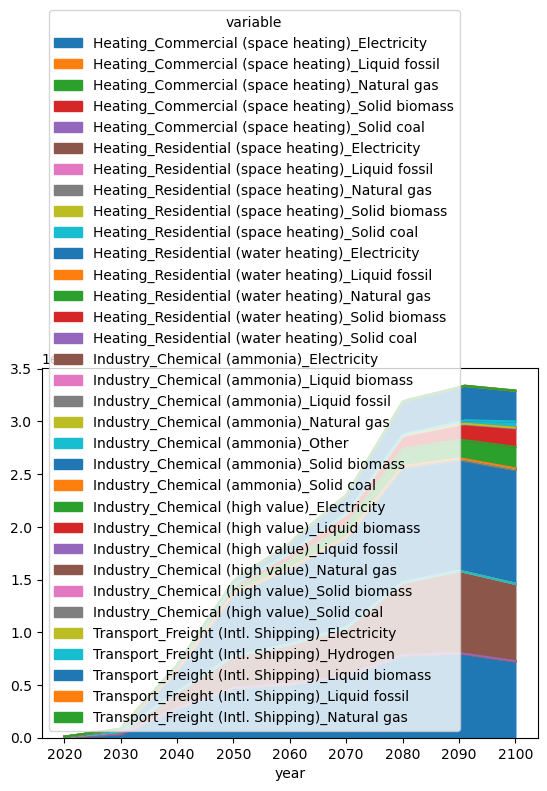

In [13]:
arr.sel(
    model="image",
    scenario="SSP2-RCP19",
    impact_category="Vanadium - natural resource - in ground - kilogram"
).sum(dim=["act_category", "region"]).to_dataframe("x").unstack()["x"].plot(kind="area")

In [8]:
df.to_csv("results_image_SSP2-RCP19.csv")

In [11]:
import yaml
import pandas as pd

# Replace 'your_yaml_file.yaml' with the path to your YAML file
yaml_file_path = '/Users/romain/GitHub/pathways/pathways/data/activities_classifications.yaml'

# Replace 'your_excel_file.xlsx' with the path to your Excel file
excel_file_path = '/Users/romain/GitHub/pathways/dev/missing_classifications.xlsx'

# Load the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)

# Load the Excel file
excel_content = pd.read_excel(excel_file_path)

# Convert Excel data to the same tuple format as YAML keys
excel_tuples = [
    ((row['name'], row['reference product'], row['unit'], row['location']), row['classification'])
    for index, row in excel_content.iterrows()
]

# Update the YAML dictionary with the new classifications from the Excel file
for csv_key, classification in excel_tuples:
    yaml_content[csv_key] = classification

# Save the updated dictionary to a new YAML file
# Replace 'updated_yaml_file.yaml' with the path where you want to save the updated file
updated_yaml_file_path = 'updated_yaml_file.yaml'

with open(updated_yaml_file_path, 'w') as file:
    yaml.dump(yaml_content, file)

print(f'Updated YAML file saved to {updated_yaml_file_path}')


Updated YAML file saved to updated_yaml_file.yaml


In [18]:
p.scenarios.sel(
    variables=[x for x in p.scenarios.coords["variables"].values if x.startswith("Transport")],
    region="World"
)

<xarray.DataArray 'value' (model: 1, pathway: 1, variables: 5, year: 2)>
array([[[[0.0, 4.667243],
         [0.0, 0.0],
         [0.0, 0.0],
         [1.3415830078800094e-17, 0.069667796875],
         [7.440479, 2.801207]]]], dtype=object)
Coordinates:
  * pathway    (pathway) object 'SSP2-RCP19'
    region     <U5 'World'
  * year       (year) int64 2005 2050
  * model      (model) <U5 'image'
  * variables  (variables) <U49 'Transport_Freight_(Intl._Shipping)_Liquid_bi...
Attributes:
    units:    {'dac_solvent': 'Mt CO2/yr', 'Heating_Commercial_(space_heating...

In [6]:
cols = [
    c for c in arr.sel(act_category="other").to_dataframe("x").unstack().reset_index().columns
    if "electricity" in c[1].lower() and c[0] == "x"
]
cols

[('x', 'Heating_Commercial_(space_heating)_Electricity'),
 ('x', 'Heating_Residential_(space_heating)_Electricity'),
 ('x', 'Heating_Residential_(water_heating)_Electricity'),
 ('x', 'Industry_Chemical_(ammonia)_Electricity'),
 ('x', 'Industry_Chemical_(high_value)_Electricity'),
 ('x', 'Transport_Freight_(Intl._Shipping)_Electricity')]

In [7]:
arr.sel(act_category="other")

<xarray.DataArray 'value' (model: 1, scenario: 1, year: 46, region: 1,
                           impact_category: 1, variable: 33)>
array([[[[[[5.08234160e+10, 7.87668540e+10, 8.05574141e+10, ...,
            0.00000000e+00, 7.00791453e+10, 0.00000000e+00]]],


         [[[5.09058254e+10, 7.75201896e+10, 7.91272103e+10, ...,
            1.28381793e+09, 6.90118953e+10, 0.00000000e+00]]],


         [[[5.09882348e+10, 7.62735252e+10, 7.76970065e+10, ...,
            2.56763586e+09, 6.79446453e+10, 0.00000000e+00]]],


         ...,


         [[[5.43670204e+10, 2.51602843e+10, 1.90586510e+10, ...,
            5.52041711e+10, 2.41873958e+10, 0.00000000e+00]]],


         [[[5.44494298e+10, 2.39136199e+10, 1.76284472e+10, ...,
            5.64879890e+10, 2.31201458e+10, 0.00000000e+00]]],


         [[[5.45318392e+10, 2.26669555e+10, 1.61982434e+10, ...,
            5.77718069e+10, 2.20528958e+10, 0.00000000e+00]]]]]])
Coordinates:
  * model            (model) object 'image'
  * scenario         (scenario) object 'SSP2-RCP19'
  * region           (region) object 'World'
  * impact_category  (impact_category) object 'IPCC 2021 - climate change - G...
  * variable         (variable) object 'Heating_Commercial_(space_heating)_El...
    act_category     <U5 'other'
  * year             (year) int64 2005 2006 2007 2008 ... 2047 2048 2049 2050

In [32]:
p.mapping["Transport_Passenger_Electricity"]

{'dataset': {'name': 'market group for electricity, low voltage',
  'reference product': 'electricity, low voltage',
  'unit': 'kilowatt hour'},
 'scenario variable': 'Final Energy|Transportation|Passenger|Electricity'}

In [8]:
df = arr.sel(act_category="other").to_dataframe("x").unstack().reset_index()
df.loc[:, cols]

x  \
variable Heating_Commercial_(space_heating)_Electricity   
0                                          5.082342e+10   
1                                          5.090583e+10   
2                                          5.098823e+10   
3                                          5.107064e+10   
4                                          5.115305e+10   
5                                          5.123546e+10   
6                                          5.131787e+10   
7                                          5.140028e+10   
8                                          5.148269e+10   
9                                          5.156510e+10   
10                                         5.164751e+10   
11                                         5.172992e+10   
12                                         5.181233e+10   
13                                         5.189474e+10   
14                                         5.197715e+10   
15                                         5.205956e+10   
16                                         5.214197e+10   
17                                         5.222438e+10   
18                                         5.230679e+10   
19                                         5.238919e+10   
20                                         5.247160e+10   
21                                         5.255401e+10   
22                                         5.263642e+10   
23                                         5.271883e+10   
24                                         5.280124e+10   
25                                         5.288365e+10   
26                                         5.296606e+10   
27                                         5.304847e+10   
28                                         5.313088e+10   
29                                         5.321329e+10   
30                                         5.329570e+10   
31                                         5.337811e+10   
32                                         5.346052e+10   
33                                         5.354293e+10   
34                                         5.362534e+10   
35                                         5.370775e+10   
36                                         5.379015e+10   
37                                         5.387256e+10   
38                                         5.395497e+10   
39                                         5.403738e+10   
40                                         5.411979e+10   
41                                         5.420220e+10   
42                                         5.428461e+10   
43                                         5.436702e+10   
44                                         5.444943e+10   
45                                         5.453184e+10   

                                                          \
variable Heating_Residential_(space_heating)_Electricity   
0                                           0.000000e+00   
1                                           8.160550e+08   
2                                           1.632110e+09   
3                                           2.448165e+09   
4                                           3.264220e+09   
5                                           4.080275e+09   
6                                           4.896330e+09   
7                                           5.712385e+09   
8                                           6.528440e+09   
9                                           7.344495e+09   
10                                          8.160550e+09   
11                                          8.976605e+09   
12                                          9.792660e+09   
13                                          1.060872e+10   
14                                          1.142477e+10   
15                                          1.224083e+10   
16                                          1.305688e+10   
17                                          1.387294e+10   
18                   

In [29]:
p.scenarios.sel(
    model="image",
    pathway="SSP2-RCP19",
    region="World",
    variables=[c[1] for c in cols]
)

<xarray.DataArray 'value' (variables: 14, year: 2)>
array([[0.0, 0.0],
       [0.0, 0.27399100800000004],
       [1327.5010559999998, 5211.887103999999],
       [1.327501056, 5.2118871040000005],
       [1401.7859839999999, 662.85088],
       [1595.011968, 4739.643904],
       [2718.476032, 9365.069824],
       [0.0, 0.0],
       [0.0, 0.4390741875],
       [1.4624859392642975e-07, 2.5065459999999997],
       [3.525719046592712e-07, 2.0155689999999997],
       [0.0, 0.0],
       [0.280205, 2.791153],
       [0.7107158124999999, 18.028119999999998]], dtype=object)
Coordinates:
    pathway    <U10 'SSP2-RCP19'
    region     <U5 'World'
  * year       (year) int64 2005 2050
    model      <U5 'image'
  * variables  (variables) <U49 'Industry_Chemical_(ammonia)_Electricity' ......
Attributes:
    units:    {'dac_solvent': 'Mt CO2/yr', 'Industry_Food_and_Tobacco_Electri...

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'other' contains both positive and negative values

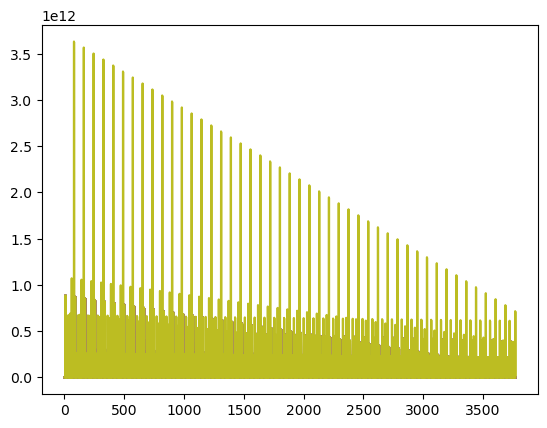

In [5]:
arr.to_dataframe("val").unstack()["val"].plot(kind="area")

In [24]:
import yaml
fp="/Users/romain/GitHub/pathways/pathways/data/activities_classifications.yaml"
with open(fp, 'rb') as fp:
    cat = yaml.full_load(fp)

In [25]:
cat

{('1,1-difluoroethane production, HFC-152a',
  '1,1-difluoroethane, HFC-152a',
  'kilogram',
  'RoW'): 'Manufacture of basic chemicals',
 ('1,1-difluoroethane production, HFC-152a',
  '1,1-difluoroethane, HFC-152a',
  'kilogram',
  'US'): 'Manufacture of basic chemicals',
 ('1,1-dimethylcyclopentane to generic market for solvent, organic',
  'solvent, organic',
  'kilogram',
  'GLO'): 'Manufacture of chemicals and chemical products',
 ('1-methoxy-2-propanol production',
  '1-methoxy-2-propanol',
  'kilogram',
  'GLO'): 'Manufacture of basic chemicals',
 ('1-methylcyclopropene production',
  '1-methylcyclopropene',
  'kilogram',
  'GLO'): 'Manufacture of basic chemicals',
 ('1-methylcyclopropene production',
  'sodium chloride, powder',
  'kilogram',
  'GLO'): 'Manufacture of basic chemicals',
 ('1-naphthylacetic acid production',
  '1-naphthylacetic acid',
  'kilogram',
  'GLO'): 'Manufacture of basic chemicals',
 ('1-propanol production',
  '1-propanol',
  'kilogram',
  'RER'): 'Manuf

In [20]:
arr.sel(
    region="World",
).sum()

<xarray.DataArray 'value' ()>
array(5.31157551e+11)
Coordinates:
    region   <U5 'World'

In [ ]:
import seaborn as sns
df = p.scenarios.sel(region="World", model="image", pathway="SSP2-Base").to_dataframe("val").unstack()["val"]

import matplotlib.pyplot as plt
df.T.plot(kind="area", stacked=True,
       #color=color_palette, 
       figsize=(7, 5))
plt.ylim(0, 400)
plt.legend(ncols=2)
plt.title("Global electricity production mix")
plt.ylabel("Exajoules")
plt.savefig("electricity_mix_Base.png")

In [7]:
arr_human_health = arr.copy()
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)")] *= 1.15E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)")] *= 2.70E+00
arr_human_health.loc[dict(impact_category="EF v3.1 - particulate matter formation - impact on human health")] *= 2.14E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235")] *= 2.10E-08

In [13]:
p.lca_results.sel(
        model="image",
        scenario="SSP2-Base",
        region="World",
        impact_category="EF v3.1 - climate change - global warming potential (GWP100)"
    ).sum(dim=["act_category", "variable"])/1e3/1e9

<xarray.DataArray (year: 15)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
    impact_category  <U60 'EF v3.1 - climate change - global warming potentia...
  * year             (year) int64 2005 2010 2015 2020 ... 2070 2080 2090 2100
    region           <U5 'World'
    model            <U5 'image'
    scenario         <U9 'SSP2-Base'

In [14]:
p.lca_results.sel(
        model="image",
        scenario="SSP2-Base",
        region="World",
        impact_category="EF v3.1 - climate change - global warming potential (GWP100)"
    ).sum(dim=["act_category", "variable"])/1e3/1e9

<xarray.DataArray (year: 15)>
array([23.61215941, 24.78051733, 28.21516367, 35.00152945, 36.99087931,
       39.8899597 , 42.72311544, 45.61040504, 48.32952551, 47.18497341,
       36.3159623 , 28.77312683, 21.90898907, 22.29171039, 24.79193269])
Coordinates:
    impact_category  <U60 'EF v3.1 - climate change - global warming potentia...
  * year             (year) int64 2005 2010 2015 2020 ... 2070 2080 2090 2100
    region           <U5 'World'
    model            <U5 'image'
    scenario         <U9 'SSP2-Base'

In [6]:
import numpy as np
all_elec = np.array([
    9284.128746,
    10822.55546,
    11751.26338,
    13154.49659,
    13879.48497,
    15324.33017,
    16971.71386,
    18973.94467,
    20680.4471,
    20869.20293,
    18843.73411,
    19044.38083,
    19493.99837,
    19398.71915,
    19882.06689,
]) * 1e9

coal = np.array([
    7647.148928,
    8917.222898,
    9664.471945,
    11233.23258,
    12174.27898,
    13310.45063,
    14582.37004,
    16350.9504,
    17842.07757,
    17458.07759,
    13901.3199,
    12525.36265,
    11777.23066,
    11047.29605,
    12894.74249
]) * 1e9

years = [2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2060, 2070, 2080, 2090, 2100]

NameError: name 'years' is not defined

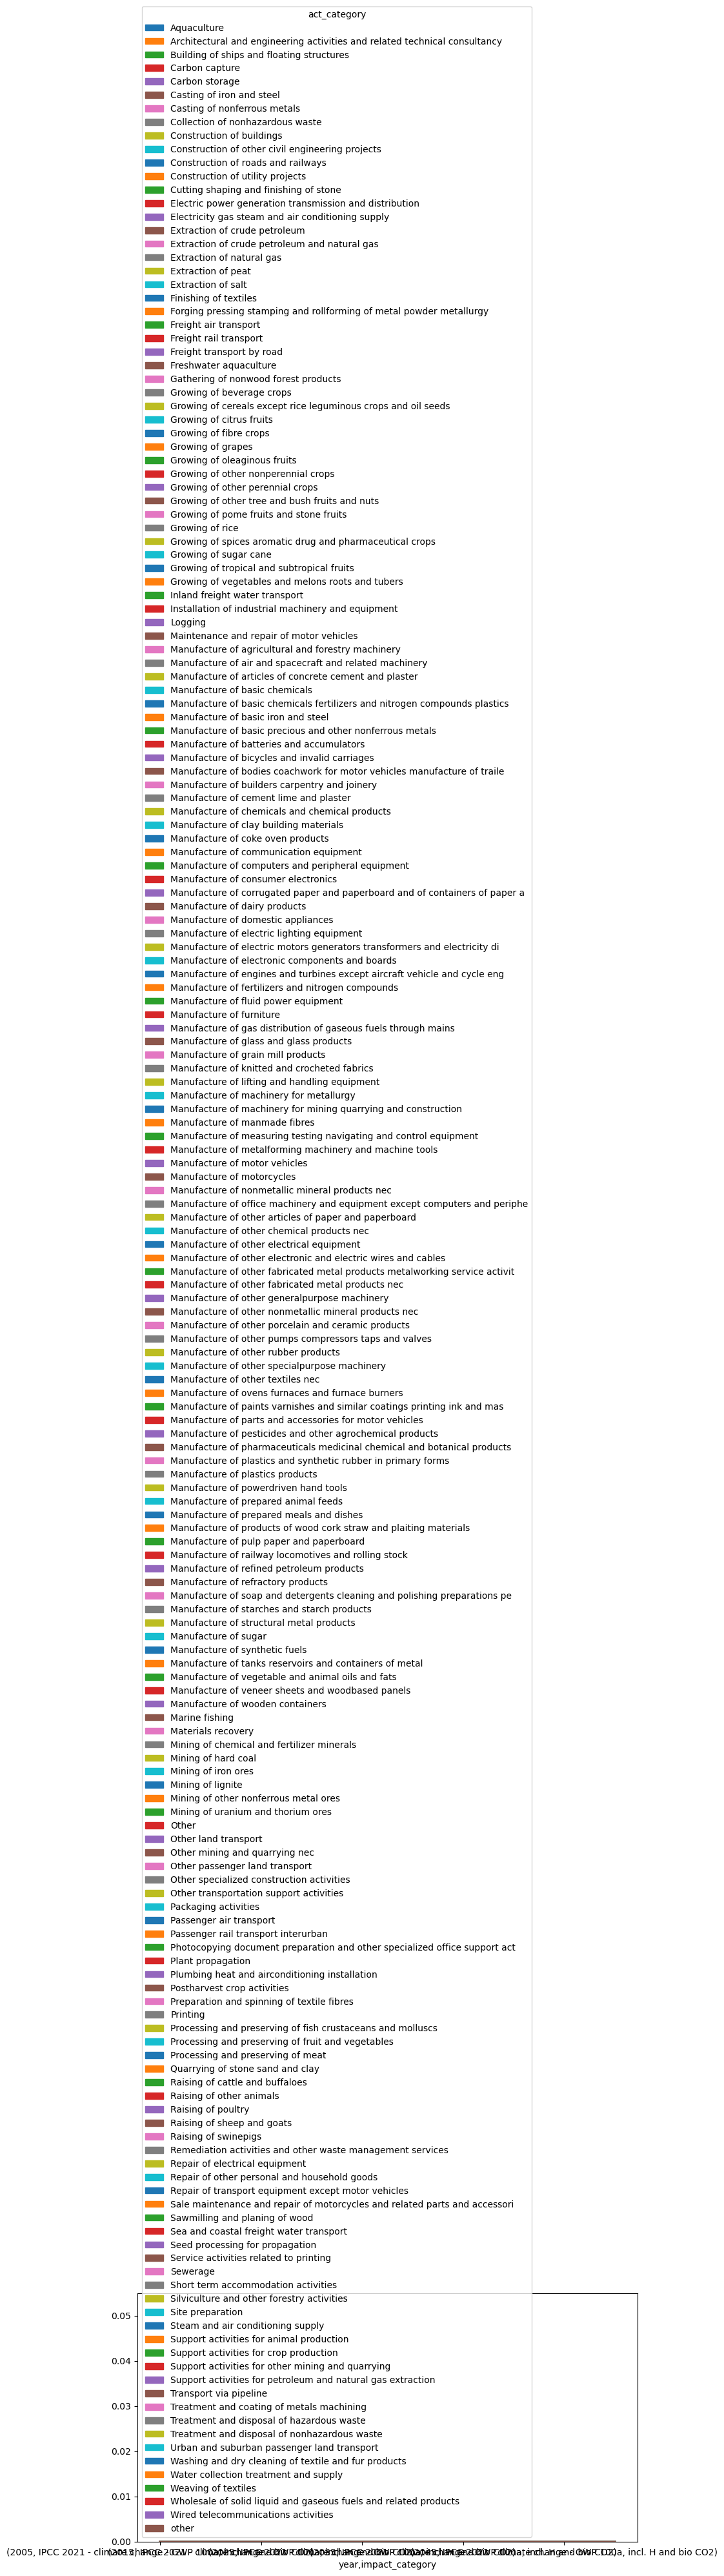

In [9]:
import matplotlib.pyplot as plt
ax = (
    arr.sel(
        model="image",
        scenario="SSP2-RCP19",
        region=[r for r in arr.region.values if r!="World"],
        #region=["World",],
        #variable=[v for v in arr.coords["variable"].values if v!="Electricity"],
        #variable=["Electricity"],
        #impact_category="EF v3.1 - climate change - global warming potential (GWP100)",
    ).sum(dim=["region", "variable"])
).to_dataframe("val").unstack()["val"].plot(kind="area", stacked=True, figsize=(10, 5))

ax.plot(years, all_elec, linewidth=5, c="y", linestyle="-.")


plt.legend(ncols=3, fontsize=5)

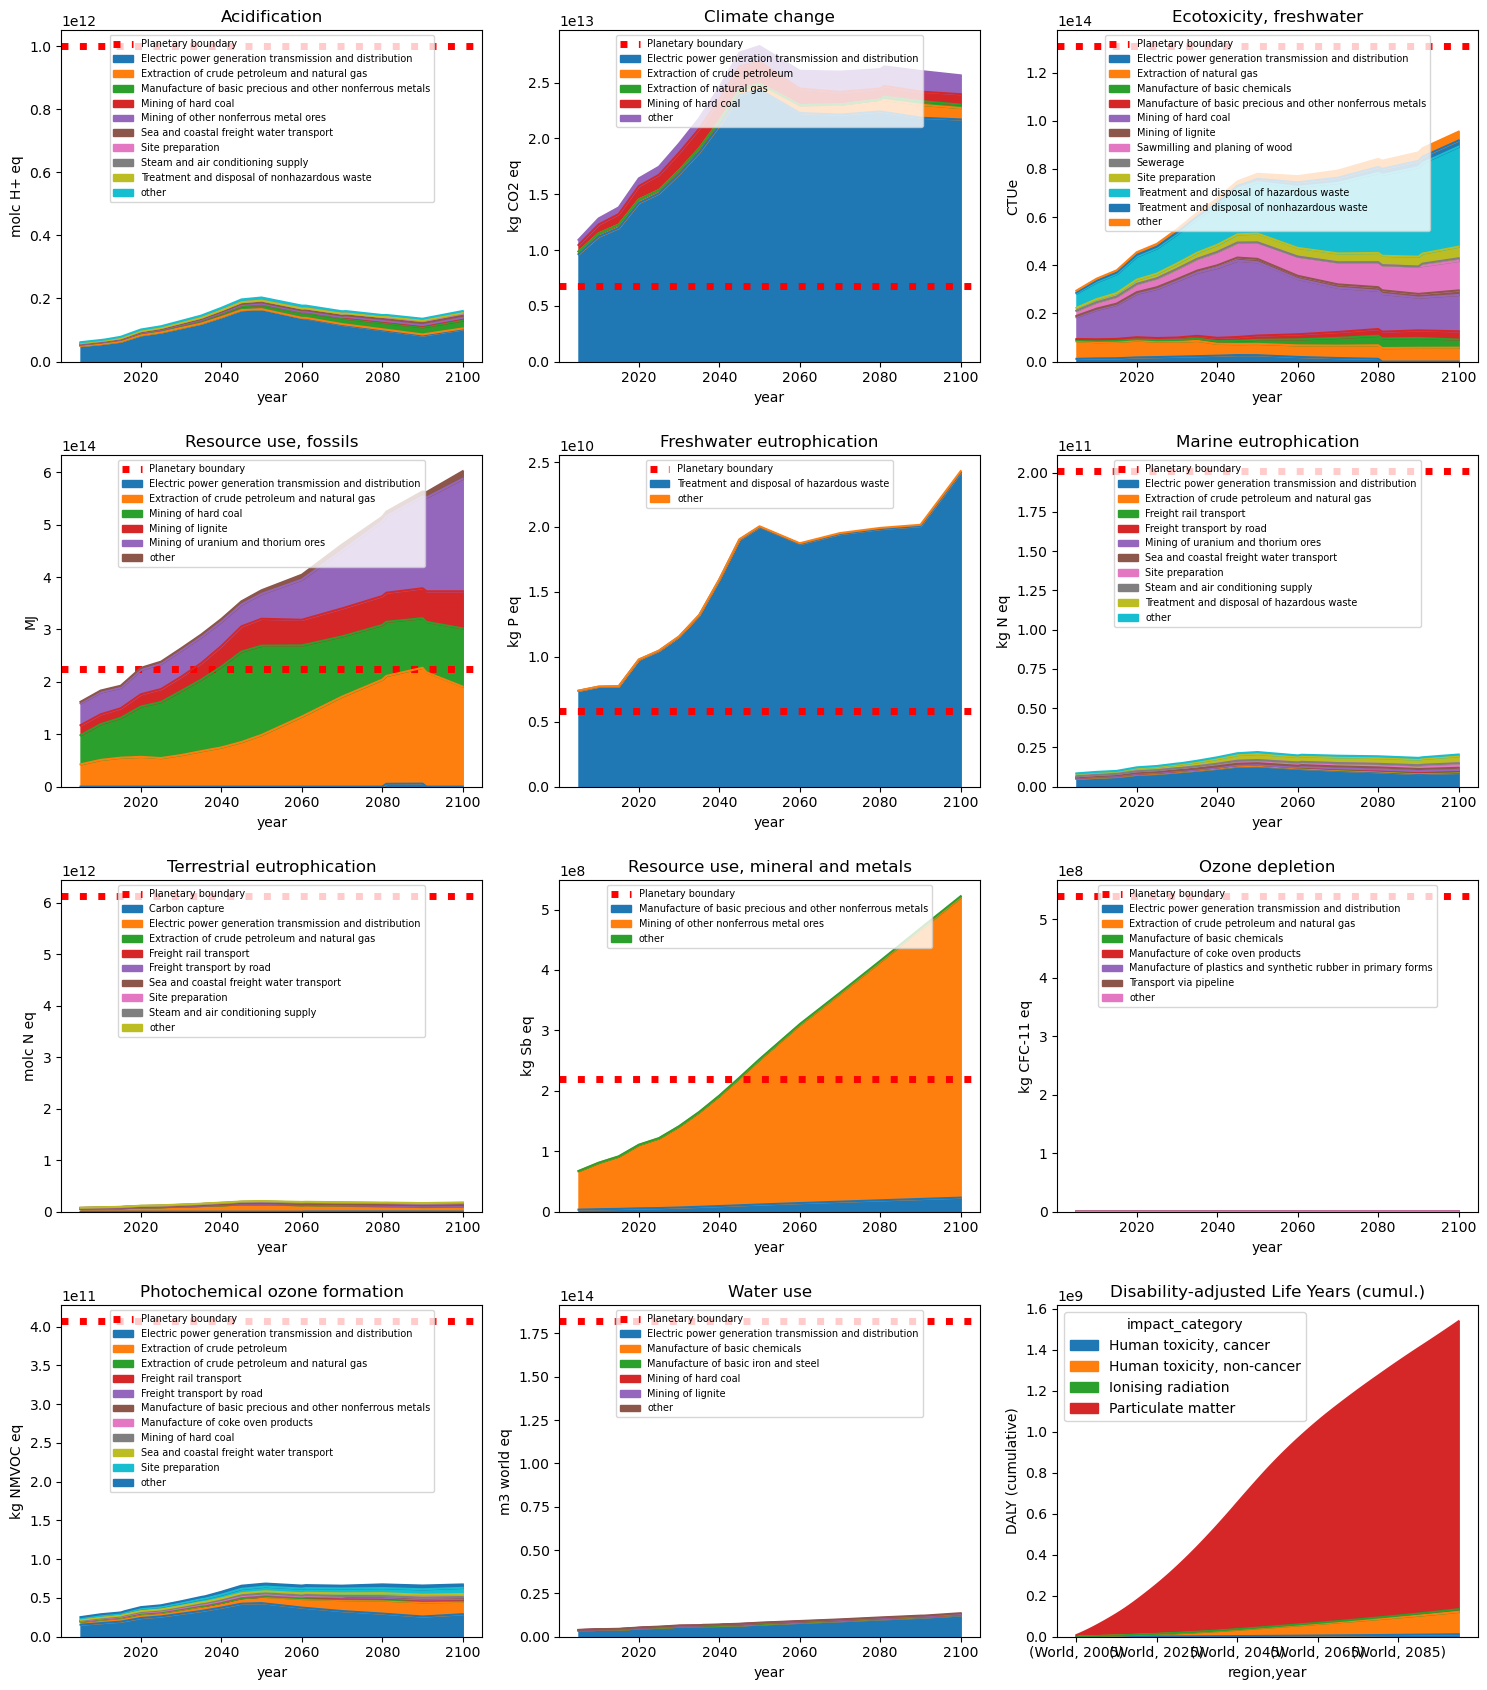

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

arr_human_health = arr.copy()
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)")] *= 1.15E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)")] *= 2.70E+00
arr_human_health.loc[dict(impact_category="EF v3.1 - particulate matter formation - impact on human health")] *= 2.14E+01
arr_human_health.loc[dict(impact_category="EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235")] *= 2.10E-08

scenario="SSP2-Base"

# Fill NaNs with 0 (optional, depending on how you want to handle NaNs)
df = arr.sel(model="image", scenario=scenario).to_dataframe("val").unstack()["val"].reset_index()
df_base = arr.sel(model="image", scenario="SSP2-Base").to_dataframe("val").unstack()["val"].reset_index()

d_titles = {
    'Cumulative Energy Demand (CED) - total - energy content (HHV)': "Cumulative Energy Demand",
    'IPCC 2021 - climate change - GWP 100a, incl. H': "climate change, 100y",
    'EN15804 - inventory indicators ISO21930 - use of net fresh water': "use of net fresh water",
    'selected LCI results, additional - air - particulates': "air - particulates",
    'selected LCI results - resource - land occupation': "land occupation",
    'EF v3.1 - climate change - global warming potential (GWP100)': "climate change",
    'EF v3.1 - ozone depletion - ozone depletion potential (ODP)': "ozone depletion",
    'EF v3.1 - photochemical oxidant formation: human health - tropospheric ozone concentration increase': "Photochemical ozone formation",
    'EF v3.1 - eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)': "freshwater eutrophication",
    'EF v3.1 - eutrophication: marine - fraction of nutrients reaching marine end compartment (N)': "marine eutrophication",
    'EF v3.1 - acidification - accumulated exceedance (AE)': "ocean acidification",
    'EF v3.1 - eutrophication: terrestrial - accumulated exceedance (AE)': "terrestrial eutrophication",
    'selected LCI results - resource - land occupation': "land use",
    'EN15804 - inventory indicators ISO21930 - use of net fresh water': "use of freshwater"
}

d_titles.update(
  {v["method"]: k for k, v in planetary_boundaries.items()}
)

d_units = {
    'Cumulative Energy Demand (CED) - total - energy content (HHV)': "MJ primary",
    'IPCC 2021 - climate change - GWP 100a, incl. H': "kg CO$_2$-eq.",
    'EN15804 - inventory indicators ISO21930 - use of net fresh water': "m$^3$",
    'selected LCI results, additional - air - particulates': "kg",
    'selected LCI results - resource - land occupation': "m$^2$-year",
}
d_units.update(
    {v["method"]: v["unit"] for k, v in planetary_boundaries.items()}
)

# Define your categories
impact_categories = df['impact_category'].unique()


fig, axs = plt.subplots(4, 3, figsize=(15, 17))
axs = axs.ravel()  # flatten the array to iterate over it

skip_cats = [
    "EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)",
    "EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)",
    "EF v3.1 - particulate matter formation - impact on human health",
    "EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235",
]

impact_categories = [i for i in impact_categories if i not in skip_cats]

for ax, impact_category in zip(axs, impact_categories):
    if impact_category in skip_cats:
        continue
    
    ax.axhline(planetary_boundaries[d_titles[impact_category]]["value"], 0, 6, linewidth=5, color = 'r', linestyle=":", label="Planetary boundary")
    
    df_ = df[df["impact_category"] == impact_category]
    df_ = df_.set_index("year")
    
    df_ = df_.fillna(0)
    
    # Calculate total impact for each row
    df_['total'] = df_.loc[:, "Carbon capture":"Treatment and disposal of nonhazardous waste"].select_dtypes(include=[np.number]).sum(axis=1)

    # Calculate proportion for each numeric column
    proportions = df_.loc[:, "Carbon capture": "Treatment and disposal of nonhazardous waste"].divide(df_['total'], axis=0)

    # Identify columns where all values are less than 1% of the total
    cols_to_move = proportions.columns[(proportions.sum() < 0.01)]

    # Add these values to 'other' column
    df_['other'] += df_.loc[:, cols_to_move].sum(axis=1)

    # Drop these columns
    df_ = df_.drop(columns=cols_to_move)

    # Drop the 'total' column as it's not needed anymore
    df_ = df_.drop(columns='total')

    df_.plot(kind="area", stacked=True, ax=ax)
    
    ax.set_title(d_titles[impact_category])
    ax.set_ylabel(d_units.get(impact_category))
    
    # Set the title for each subplot
    #ax.legend(ncols=4)
    ax.legend(fontsize=7, loc="upper center", ncols=1)
    

# Fill NaNs with 0 (optional, depending on how you want to handle NaNs)
df = arr_human_health.sel(model="image", scenario=scenario, impact_category=skip_cats).sum(dim="act_category").to_dataframe("val").unstack()["val"].reset_index()
df = df.groupby(["region", "year", "impact_category"]).sum().unstack()["Electricity"]
df = df.rename(columns={
    'EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, cancer',
    'EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, non-cancer',
    'EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235': 'Ionising radiation',
    'EF v3.1 - particulate matter formation - impact on human health': 'Particulate matter'
})
df.cumsum().plot(kind="area", stacked=True, ax=axs[11])
# Create a pivot table where index is 'year', columns are 'act_category', and values are 'WEU'
#pivot = df.pivot_table(values='World', index='year', columns='impact_category', fill_value=0)


# Create the stackplot
#axs[11].stackplot(pivot.index, pivot.T.cumsum(1), labels=pivot.columns)

axs[11].set_title("Disability-adjusted Life Years (cumul.)")
axs[11].set_ylabel("DALY (cumulative)")

#df = arr_human_health.sel(model="image", scenario=scenario, impact_category=skip_cats).sum(dim="act_category").to_dataframe("val").unstack()["val"].reset_index()    
# Create a pivot table where index is 'year', columns are 'act_category', and values are 'WEU'
#pivot = df.pivot_table(values='World', index='year', columns='impact_category', fill_value=0)
#pivot = pivot.rename(columns={
#    'EF v3.1 - human toxicity: carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, cancer',
#    'EF v3.1 - human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh)': 'Human toxicity, non-cancer',
#    'EF v3.1 - ionising radiation: human health - human exposure efficiency relative to u235': 'Ionising radiation',
#    'EF v3.1 - particulate matter formation - impact on human health': 'Particulate matter'
#})
#axs[11].plot(pivot.index, pivot.T.cumsum(1).sum(0), linewidth=3, c="orange", linestyle="dotted", label="SSP2-Base")

#axs[11].legend(fontsize=7, loc="upper center")

# Automatically adjust the subplot layout
plt.tight_layout()

# Display the figure
plt.savefig("results_RCP26.png")
plt.show()


In [130]:
import bw2io

In [132]:
bw2io.bw2setup??

Signature: bw2io.bw2setup()
Docstring: <no docstring>
Source:   
def bw2setup():
    if "biosphere3" in databases:
        print("Biosphere database already present!!! No setup is needed")
        return
    print("Creating default biosphere\n")
    create_default_biosphere3()
    print("Creating default LCIA methods\n")
    create_default_lcia_methods()
    print("Creating core data migrations\n")
    create_core_migrations()
File:      /opt/homebrew/Caskroom/miniforge/base/envs/ab/lib/python3.9/site-packages/bw2io/__init__.py
Type:      function

In [70]:
(df_.loc[:, "Carbon capture": "Treatment and disposal of nonhazardous waste"] / df_.loc[:, 'total'] < 0.01).all()

Carbon capture                                             False
Electric power generation transmission and distribution    False
Extraction of crude petroleum                              False
Extraction of crude petroleum and natural gas              False
Extraction of natural gas                                  False
                                                           ...  
2096                                                       False
2097                                                       False
2098                                                       False
2099                                                       False
2100                                                       False
Length: 123, dtype: bool

In [54]:
df_

act_category,region,impact_category,variable,Carbon capture,Electric power generation transmission and distribution,Extraction of crude petroleum,Extraction of crude petroleum and natural gas,Extraction of natural gas,Freight rail transport,Freight transport by road,...,Mining of uranium and thorium ores,Sawmilling and planing of wood,Sea and coastal freight water transport,Sewerage,Site preparation,Steam and air conditioning supply,Transport via pipeline,Treatment and disposal of hazardous waste,Treatment and disposal of nonhazardous waste,other
year,,,,,,,,,,,,,,,,,,,,,
2005,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.655673e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155451e+11
2006,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.730669e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.198789e+11
2007,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.805665e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242128e+11
2008,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.880660e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.285467e+11
2009,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,3.955656e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.328806e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,1.178951e+13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.749870e+11
2097,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,1.191999e+13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.910556e+11
2098,World,EF v3.1 - water use - user deprivation potenti...,Electricity,NaN,1.205047e+13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.071243e+11


In [3]:
import brightway2 as bw
bw.projects.set_current("ei39")

In [4]:
res = []

for method in bw.methods:
    m = bw.Method(method)
    res.append({"unit": m.metadata["unit"], "name": m.name, "exchanges": [{"name": bw.get_activity(x)["name"], "categories": list(bw.get_activity(x)["categories"]), "amount": y} for x, y in m.load()]})
    #for cf in m.load():
    #    r
    #    print(cf)

In [5]:
import json
with open('data.json', 'w') as f:
    json.dump(res, f)

In [6]:
bw2io.__file__


'/opt/homebrew/Caskroom/miniforge/base/envs/ab/lib/python3.9/site-packages/bw2io/__init__.py'

In [ ]:
from scipy.interpolate import interpn

c = interpn(
    ([2005, 2015, 2025, 2045, 2100], range(0, 35073), range(0, 35073)),
    np.nan_to_num(p.lca_A.sel(model="image", scenario="SSP2-Base").values),
    (2008, range(0, 35073), range(0, 35073))
)

In [22]:
import numpy as np
np.nan_to_num(c).sum()

0.0

In [10]:
import pandas as pd
df = pd.read_excel("sample/scenario_data/scenario_data2.xlsx")
#df.head()
df.columns = ["model", "pathway", "region", "variables", "unit", 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2060, 2070, 2080, 2090,2100]
#df.head()
df = df.melt(
       id_vars=["model", "pathway", "region", "variables", "unit",]
)

In [11]:
df.columns = ["model", "pathway", "region", "variable", "unit", "year", "value"]

In [12]:
df.to_csv("scenario_data2.csv", index=False)

In [3]:
df.to_csv?

Object `df.to_csv` not found.


In [13]:
df["unit"].unique()

array(['GW', 'Mt CO2/yr', '-', 'GJ/tNH3', 'MJ/Tkm', 'kg CO2/GJ-prim',
       'Gg BCyr', 'Mt BC/yr', 'Tg CH4/yr', 'Mt CH4/yr', 'MtCO2/yr',
       'Tg C/yr', 'Mt CO/yr', 'Mt CO2-equiv/yr', 'Tg N/yr', 'kt N2O/yr',
       'Mt NH3/yr', 'Tg Nyr', 'Mt NO2/yr', 'Mt NOx/yr', 'Gg OC/yr',
       'Mt OC/yr', 'Tg S/yr', 'Mt SO2/yr', 'Tg VOCyr', 'Mt VOC/yr',
       'Mt/year', '°C days', 'GJ/cap', 'GJ/m2', 'GJ', 'kJ/m2/HDD',
       'bn tkm/yr', 'bn pkm/yr', 'tN/yr', 'tP2O5/yr', 'EJ/yr', 'PJ/yr',
       'billion US$2010/yr OR local currency', 'million ha', 'Ha/GJ-Prim',
       'years', 'million', 'US$2010/GJ', 'Mtonne/yr', 'Mt/yr', '°C',
       'billion US$2010/yr'], dtype=object)